# Case Study 1: Classify Personal Income

In [1]:
import pandas as pd
import os
import numpy as np
import seaborn as sns

### To partition the data

In [2]:
from sklearn.model_selection import train_test_split

### Importing library for logistic regression

In [3]:
from sklearn.linear_model import LogisticRegression

### Importing performance metrics- 
### Accuracy score and confusion matrix

In [4]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [5]:
# os.listdir()

In [6]:
data_income = pd.read_csv('income.csv')

In [7]:
df = data_income.copy()

In [8]:
df.head(10)

age       JobType         EdType        maritalstatus          occupation  \
0   45       Private        HS-grad             Divorced        Adm-clerical   
1   24   Federal-gov        HS-grad        Never-married        Armed-Forces   
2   44       Private   Some-college   Married-civ-spouse      Prof-specialty   
3   27       Private            9th        Never-married        Craft-repair   
4   20       Private   Some-college        Never-married               Sales   
5   44       Private        HS-grad              Widowed     Exec-managerial   
6   51       Private        HS-grad   Married-civ-spouse        Craft-repair   
7   20       Private        HS-grad   Married-civ-spouse   Machine-op-inspct   
8   17             ?           11th        Never-married                   ?   
9   19       Private        HS-grad        Never-married   Machine-op-inspct   

      relationship                 race   gender  capitalgain  capitalloss  \
0    Not-in-family                White   Female            0            0   
1        Own-child                White     Male            0            0   
2          Husband                White     Male            0            0   
3   Other-relative                White     Male            0            0   
4    Not-in-family                White     Male            0            0   
5        Unmarried                Black   Female            0            0   
6          Husband   Amer-Indian-Eskimo     Male            0            0   
7          Husband                White     Male            0            0   
8        Own-child                White   Female            0            0   
9        Own-child                Black   Female            0            0   

   hoursperweek   nativecountry                        SalStat  
0            28   United-States   less than or equal to 50,000  
1            40   United-States   less than or equal to 50,000  
2            40   United-States            greater than 50,000  
3            40          Mexico   less than or equal to 50,000  
4            35   United-States   less than or equal to 50,000  
5            40   United-States   less than or equal to 50,000  
6            40   United-States   less than or equal to 50,000  
7            40   United-States   less than or equal to 50,000  
8             5   United-States   less than or equal to 50,000  
9            40   United-States   less than or equal to 50,000

### check variable data types

In [9]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31978 entries, 0 to 31977
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            31978 non-null  int64 
 1   JobType        31978 non-null  object
 2   EdType         31978 non-null  object
 3   maritalstatus  31978 non-null  object
 4   occupation     31978 non-null  object
 5   relationship   31978 non-null  object
 6   race           31978 non-null  object
 7   gender         31978 non-null  object
 8   capitalgain    31978 non-null  int64 
 9   capitalloss    31978 non-null  int64 
 10  hoursperweek   31978 non-null  int64 
 11  nativecountry  31978 non-null  object
 12  SalStat        31978 non-null  object
dtypes: int64(4), object(9)
memory usage: 3.2+ MB
None


In [10]:
df.isnull()

age  JobType  EdType  maritalstatus  occupation  relationship   race  \
0      False    False   False          False       False         False  False   
1      False    False   False          False       False         False  False   
2      False    False   False          False       False         False  False   
3      False    False   False          False       False         False  False   
4      False    False   False          False       False         False  False   
...      ...      ...     ...            ...         ...           ...    ...   
31973  False    False   False          False       False         False  False   
31974  False    False   False          False       False         False  False   
31975  False    False   False          False       False         False  False   
31976  False    False   False          False       False         False  False   
31977  False    False   False          False       False         False  False   

       gender  capitalgain  capitalloss  hoursperweek  nativecountry  SalStat  
0       False        False        False         False          False    False  
1       False        False        False         False          False    False  
2       False        False        False         False          False    False  
3       False        False        False         False          False    False  
4       False        False        False         False          False    False  
...       ...          ...          ...           ...            ...      ...  
31973   False        False        False         False          False    False  
31974   False        False        False         False          False    False  
31975   False        False        False         False          False    False  
31976   False        False        False         False          False    False  
31977   False        False        False         False          False    False  

[31978 rows x 13 columns]

### Find missing values

In [11]:
df.isnull().sum()

age              0
JobType          0
EdType           0
maritalstatus    0
occupation       0
relationship     0
race             0
gender           0
capitalgain      0
capitalloss      0
hoursperweek     0
nativecountry    0
SalStat          0
dtype: int64

### Summary of numerical variable

In [12]:
sumnum = df.describe()

In [13]:
sumnum

age   capitalgain   capitalloss  hoursperweek
count  31978.000000  31978.000000  31978.000000  31978.000000
mean      38.579023   1064.360623     86.739352     40.417850
std       13.662085   7298.596271    401.594301     12.345285
min       17.000000      0.000000      0.000000      1.000000
25%       28.000000      0.000000      0.000000     40.000000
50%       37.000000      0.000000      0.000000     40.000000
75%       48.000000      0.000000      0.000000     45.000000
max       90.000000  99999.000000   4356.000000     99.000000

### Summary of categorical variable

In [40]:
sumcate = df.describe(include='O')

In [41]:
sumcate

JobType    EdType        maritalstatus       occupation relationship  \
count      31978     31978                31978            31978        31978   
unique         9        16                    7               15            6   
top      Private   HS-grad   Married-civ-spouse   Prof-specialty      Husband   
freq       22286     10368                14692             4038        12947   

          race gender   nativecountry                        SalStat  
count    31978  31978           31978                          31978  
unique       5      2              41                              2  
top      White   Male   United-States   less than or equal to 50,000  
freq     27430  21370           29170                          24283

### Frequency of each category

In [14]:
df['JobType'].value_counts()

 Private             22286
 Self-emp-not-inc     2499
 Local-gov            2067
 ?                    1809
 State-gov            1279
 Self-emp-inc         1074
 Federal-gov           943
 Without-pay            14
 Never-worked            7
Name: JobType, dtype: int64

In [15]:
df['occupation'].value_counts()

 Prof-specialty       4038
 Craft-repair         4030
 Exec-managerial      3992
 Adm-clerical         3721
 Sales                3584
 Other-service        3212
 Machine-op-inspct    1966
 ?                    1816
 Transport-moving     1572
 Handlers-cleaners    1350
 Farming-fishing       989
 Tech-support          912
 Protective-serv       644
 Priv-house-serv       143
 Armed-Forces            9
Name: occupation, dtype: int64

### checking for unique classes

In [44]:
np.unique(df['JobType'])

array([' ?', ' Federal-gov', ' Local-gov', ' Never-worked', ' Private',
       ' Self-emp-inc', ' Self-emp-not-inc', ' State-gov', ' Without-pay'],
      dtype=object)

In [16]:
df['JobType'].unique()

array([' Private', ' Federal-gov', ' ?', ' Self-emp-inc',
       ' Self-emp-not-inc', ' Local-gov', ' State-gov', ' Without-pay',
       ' Never-worked'], dtype=object)

In [45]:
np.unique(df['occupation'])

array([' ?', ' Adm-clerical', ' Armed-Forces', ' Craft-repair',
       ' Exec-managerial', ' Farming-fishing', ' Handlers-cleaners',
       ' Machine-op-inspct', ' Other-service', ' Priv-house-serv',
       ' Prof-specialty', ' Protective-serv', ' Sales', ' Tech-support',
       ' Transport-moving'], dtype=object)

### replaece ? with nan values

In [17]:
data = pd.read_csv('income.csv', na_values=[' ?'])

### Data Preprocessing

In [18]:
data.isnull().sum()

age                 0
JobType          1809
EdType              0
maritalstatus       0
occupation       1816
relationship        0
race                0
gender              0
capitalgain         0
capitalloss         0
hoursperweek        0
nativecountry       0
SalStat             0
dtype: int64

In [19]:
missing = data[data.isnull().any(axis=1)]

#### axis=1 --> to consider at least one col. value is missing

In [21]:
missing.shape

(1816, 13)

In [50]:
missing.sort_values(['JobType'])

age        JobType         EdType           maritalstatus occupation  \
4825    18   Never-worked           10th           Never-married        NaN   
10215   23   Never-worked        7th-8th                Divorced        NaN   
14073   17   Never-worked           10th           Never-married        NaN   
19542   18   Never-worked           11th           Never-married        NaN   
22385   20   Never-worked   Some-college           Never-married        NaN   
31296   30   Never-worked        HS-grad      Married-civ-spouse        NaN   
31305   18   Never-worked   Some-college           Never-married        NaN   
8       17            NaN           11th           Never-married        NaN   
17      32            NaN   Some-college      Married-civ-spouse        NaN   
29      22            NaN   Some-college           Never-married        NaN   
42      52            NaN           12th           Never-married        NaN   
44      63            NaN        1st-4th      Married-civ-spouse        NaN   
57      72            NaN        HS-grad      Married-civ-spouse        NaN   
69      53            NaN        5th-6th                 Widowed        NaN   
73      57            NaN      Assoc-voc                 Widowed        NaN   
75      20            NaN   Some-college           Never-married        NaN   
76      21            NaN   Some-college           Never-married        NaN   
97      34            NaN        HS-grad           Never-married        NaN   
133     18            NaN           12th           Never-married        NaN   
137     65            NaN   Some-college      Married-civ-spouse        NaN   
147     42            NaN        HS-grad      Married-civ-spouse        NaN   
148     55            NaN        HS-grad      Married-civ-spouse        NaN   
153     23            NaN   Some-college           Never-married        NaN   
205     58            NaN        HS-grad      Married-civ-spouse        NaN   
213     70            NaN            9th                 Widowed        NaN   
225     20            NaN           11th   Married-spouse-absent        NaN   
228     17            NaN           11th           Never-married        NaN   
243     66            NaN        7th-8th           Never-married        NaN   
252     25            NaN     Assoc-acdm           Never-married        NaN   
288     45            NaN   Some-college      Married-civ-spouse        NaN   
...    ...            ...            ...                     ...        ...   
31478   60            NaN            9th                Divorced        NaN   
31481   82            NaN        HS-grad           Never-married        NaN   
31515   35            NaN      Bachelors      Married-civ-spouse        NaN   
31516   30            NaN      Bachelors           Never-married        NaN   
31524   71            NaN      Doctorate      Married-civ-spouse        NaN   
31526   41            NaN        HS-grad               Separated        NaN   
31527   72            NaN        HS-grad      Married-civ-spouse        NaN   
31572   54            NaN   Some-college      Married-civ-spouse        NaN   
31611   25            NaN   Some-college           Never-married        NaN   
31619   67            NaN           10th      Married-civ-spouse        NaN   
31647   17            NaN           10th           Never-married        NaN   
31669   35            NaN        HS-grad      Married-civ-spouse        NaN   
31690   43            NaN   Some-college                Divorced        NaN   
31695   52            NaN        HS-grad                Divorced        NaN   
31701   68            NaN        1st-4th                Divorced        NaN   
31728   53            NaN      Bachelors                Divorced        NaN   
31742   19            NaN        HS-grad           Never-married        NaN   
31762   64            NaN        1st-4th                Divorced        NaN   
31767   60            NaN           10th                D

### Missing val in JobType      = 1809
### Missing val in Occupation = 1816
### 1816-1807 = 7  ==> Since jobtype is 'Never Worked', 
### occupation is unfilled of these 7 rows.

In [22]:
data2 = data.dropna(axis=0)

In [23]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30162 entries, 0 to 31977
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            30162 non-null  int64 
 1   JobType        30162 non-null  object
 2   EdType         30162 non-null  object
 3   maritalstatus  30162 non-null  object
 4   occupation     30162 non-null  object
 5   relationship   30162 non-null  object
 6   race           30162 non-null  object
 7   gender         30162 non-null  object
 8   capitalgain    30162 non-null  int64 
 9   capitalloss    30162 non-null  int64 
 10  hoursperweek   30162 non-null  int64 
 11  nativecountry  30162 non-null  object
 12  SalStat        30162 non-null  object
dtypes: int64(4), object(9)
memory usage: 3.2+ MB


In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31978 entries, 0 to 31977
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            31978 non-null  int64 
 1   JobType        30169 non-null  object
 2   EdType         31978 non-null  object
 3   maritalstatus  31978 non-null  object
 4   occupation     30162 non-null  object
 5   relationship   31978 non-null  object
 6   race           31978 non-null  object
 7   gender         31978 non-null  object
 8   capitalgain    31978 non-null  int64 
 9   capitalloss    31978 non-null  int64 
 10  hoursperweek   31978 non-null  int64 
 11  nativecountry  31978 non-null  object
 12  SalStat        31978 non-null  object
dtypes: int64(4), object(9)
memory usage: 3.2+ MB


### Relationship between independent variables

In [25]:
correlation = data2.corr()

In [26]:
correlation

age  capitalgain  capitalloss  hoursperweek
age           1.000000     0.080154     0.060165      0.101599
capitalgain   0.080154     1.000000    -0.032229      0.080432
capitalloss   0.060165    -0.032229     1.000000      0.052417
hoursperweek  0.101599     0.080432     0.052417      1.000000

## Cross tables and Data visualization

In [39]:
data2.columns

Index(['age', 'JobType', 'EdType', 'maritalstatus', 'occupation',
       'relationship', 'race', 'gender', 'capitalgain', 'capitalloss',
       'hoursperweek', 'nativecountry', 'SalStat'],
      dtype='object')

### gender proportion

In [46]:
gender = pd.crosstab(index = data2['gender'],
                    columns = 'count',
                     aggfunc='median',
                     values = data2['hoursperweek']
                    )

In [47]:
print(gender)

col_0    count
gender        
 Female     40
 Male       40


### gender vs. salary status

In [56]:
gender_salstat = pd.crosstab(index= data['gender'],
                            columns = data['SalStat'],
                             margins = True,
                             normalize = True
                            )

In [57]:
print(gender_salstat)

SalStat   greater than 50,000   less than or equal to 50,000    All
gender                                                             
 Female                  1162                           9446  10608
 Male                    6533                          14837  21370
All                      7695                          24283  31978


### frequency distribution of salary status

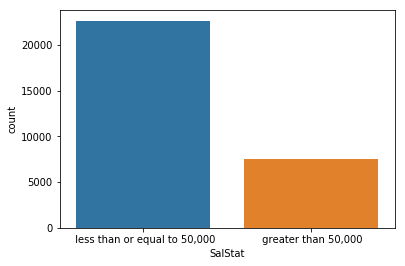

In [61]:
Salstat = sns.countplot(data2['SalStat'])

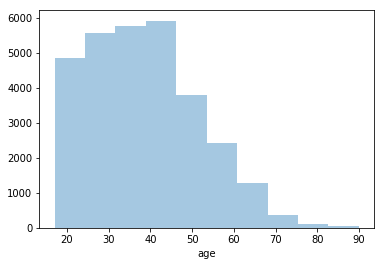

In [62]:
sns.distplot(data2['age'], bins=10, kde=False)

## Bivariate analysis for Age vs Salstat

SalStat
 greater than 50,000             43
 less than or equal to 50,000    34
Name: age, dtype: int64

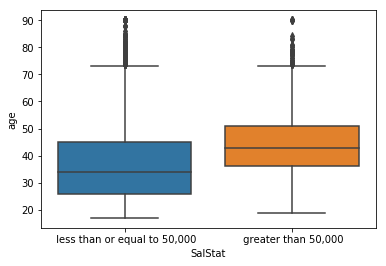

In [63]:
sns.boxplot('SalStat', 'age', data=data2)
data2.groupby('SalStat')['age'].median()

## Do bivariate analysis for

In [64]:
1. jobtype vs. Salary status
2. Education vs. Salary status
3. Occupation vs. Salary status
4. Hoursper week vs . Salary status
5. Capital Gain


SyntaxError: invalid syntax (<ipython-input-64-e4846cbe1de3>, line 1)

# Logistic Regression Model

### Reindex salstat names to 0,1

In [70]:
# print(data2['SalStat'])

data2['SalStat'] = data2['SalStat'].map(
        {
            ' less than or equal to 50,000':0,
            ' greater than 50,000':1
        }
)

/Users/guneshs/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [72]:
# data2['SalStat']

In [74]:
new_data = pd.get_dummies( data2, drop_first = True)

In [75]:
new_data.head()

age  capitalgain  capitalloss  hoursperweek  SalStat  JobType_ Local-gov  \
0   45            0            0            28        0                   0   
1   24            0            0            40        0                   0   
2   44            0            0            40        1                   0   
3   27            0            0            40        0                   0   
4   20            0            0            35        0                   0   

   JobType_ Private  JobType_ Self-emp-inc  JobType_ Self-emp-not-inc  \
0                 1                      0                          0   
1                 0                      0                          0   
2                 1                      0                          0   
3                 1                      0                          0   
4                 1                      0                          0   

   JobType_ State-gov            ...              nativecountry_ Portugal  \
0                   0            ...                                    0   
1                   0            ...                                    0   
2                   0            ...                                    0   
3                   0            ...                                    0   
4                   0            ...                                    0   

   nativecountry_ Puerto-Rico  nativecountry_ Scotland  nativecountry_ South  \
0                           0                        0                     0   
1                           0                        0                     0   
2                           0                        0                     0   
3                           0                        0                     0   
4                           0                        0                     0   

   nativecountry_ Taiwan  nativecountry_ Thailand  \
0                      0                        0   
1                      0                        0   
2                      0                        0   
3                      0                        0   
4                      0                        0   

   nativecountry_ Trinadad&Tobago  nativecountry_ United-States  \
0                               0                             1   
1                               0                             1   
2                               0                             1   
3                               0                             0   
4                               0                             1   

   nativecountry_ Vietnam  nativecountry_ Yugoslavia  
0                       0                          0  
1                       0                          0  
2                       0                          0  
3                       0                          0  
4                       0                          0  

[5 rows x 95 columns]

## dividde cols to dependent and indepenednt
# dependent = y
# indepent = x

### Storing col. names

In [76]:
columns_list = list(new_data.columns)

In [77]:
print(columns_list)

['age', 'capitalgain', 'capitalloss', 'hoursperweek', 'SalStat', 'JobType_ Local-gov', 'JobType_ Private', 'JobType_ Self-emp-inc', 'JobType_ Self-emp-not-inc', 'JobType_ State-gov', 'JobType_ Without-pay', 'EdType_ 11th', 'EdType_ 12th', 'EdType_ 1st-4th', 'EdType_ 5th-6th', 'EdType_ 7th-8th', 'EdType_ 9th', 'EdType_ Assoc-acdm', 'EdType_ Assoc-voc', 'EdType_ Bachelors', 'EdType_ Doctorate', 'EdType_ HS-grad', 'EdType_ Masters', 'EdType_ Preschool', 'EdType_ Prof-school', 'EdType_ Some-college', 'maritalstatus_ Married-AF-spouse', 'maritalstatus_ Married-civ-spouse', 'maritalstatus_ Married-spouse-absent', 'maritalstatus_ Never-married', 'maritalstatus_ Separated', 'maritalstatus_ Widowed', 'occupation_ Armed-Forces', 'occupation_ Craft-repair', 'occupation_ Exec-managerial', 'occupation_ Farming-fishing', 'occupation_ Handlers-cleaners', 'occupation_ Machine-op-inspct', 'occupation_ Other-service', 'occupation_ Priv-house-serv', 'occupation_ Prof-specialty', 'occupation_ Protective-s

### Separating inout names from data (dependent valriables)

In [78]:
features = list( set(columns_list)- set(new_data['SalStat']))

In [79]:
print(features)

['occupation_ Craft-repair', 'maritalstatus_ Married-civ-spouse', 'race_ Black', 'nativecountry_ Italy', 'EdType_ Preschool', 'JobType_ State-gov', 'nativecountry_ Holand-Netherlands', 'nativecountry_ Columbia', 'nativecountry_ Hong', 'nativecountry_ Puerto-Rico', 'JobType_ Self-emp-not-inc', 'relationship_ Other-relative', 'nativecountry_ Canada', 'EdType_ Assoc-voc', 'maritalstatus_ Never-married', 'EdType_ Prof-school', 'nativecountry_ United-States', 'nativecountry_ Hungary', 'EdType_ Assoc-acdm', 'age', 'relationship_ Wife', 'nativecountry_ Outlying-US(Guam-USVI-etc)', 'relationship_ Own-child', 'nativecountry_ Vietnam', 'EdType_ Bachelors', 'JobType_ Self-emp-inc', 'JobType_ Local-gov', 'EdType_ Masters', 'nativecountry_ China', 'relationship_ Not-in-family', 'EdType_ HS-grad', 'race_ White', 'nativecountry_ Thailand', 'SalStat', 'occupation_ Priv-house-serv', 'nativecountry_ South', 'nativecountry_ Nicaragua', 'maritalstatus_ Widowed', 'nativecountry_ India', 'capitalloss', 'nat

### Storing output values in y (Independent)

In [80]:
y = new_data['SalStat'].values

In [81]:
print(y)

[0 0 1 ... 0 0 0]


### Storing the values from input features ( Dependent)

In [82]:
x = new_data[features].values

In [83]:
print(x)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 1 0 ... 0 0 1]
 ...
 [0 1 0 ... 0 0 1]
 [0 1 0 ... 0 0 1]
 [0 0 0 ... 0 0 0]]


### Splitting the data into train test split

In [84]:
train_x, test_x, train_y, test_y = train_test_split(
        x, y, test_size = 0.3, random_state = 0
)

### Make an instance of the model